In [2]:
# autoreload modules when files have been altered
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append("/home/andy/Documents/Research/SF/GitRepo/seestar/")
import SelectionGrid
import IsochroneScaling
import ArrayMechanics
#from seestar import ArrayMechanics
#from seestar import SelectionGrid

SyntaxError: invalid syntax (StatisticalModels.py, line 214)

In [46]:
SF = SelectionGrid.SFGenerator('/media/andy/37E3-0F91/Research/SF/SFdata/Galaxia3_new/Galaxia3_new_fileinfo.pickle')

Would you like the selection function in: a) observable, b) intrinsic, c) both? (return a, b or c)c
Path to intrinsic SF (Galaxia3_new_SF.pickle) exists. Load SF in from here? (y/n)y
Path to observable SF (Galaxia3_new_obsSF.pickle) exists. Use this to ? (y/n)y
Path to field overlap info (Galaxia3_new_fieldoverlapdatabase) exists. This will be used.

{'glon': 'phi', 'Colmin': 'Colmin', 'glat': 'theta', 'Colmax': 'Colmax', 'Magmin': 'Magmin', 'Magmax': 'MagMax', 'fieldID': 'fieldID', 'halfangle': 'halfangle'}
Filtering for null values in field: Total star count = 3. Filtered star count = 3. 0 stars removed with null values
Unpickling survey selection function...
...done.

Unpickling colour-magnitude interpolant dictionaries...
...done.



In [21]:
IsoCalculator = IsochroneScaling.IntrinsicToObservable()
IsoCalculator.LoadColMag(SF.isocolmag_pickle)

In [22]:
from seestar import surveyInfoPickler
fileinfo = surveyInfoPickler.surveyInformation('/media/andy/37E3-0F91/Research/SF/SFdata/Galaxia3_new/Galaxia3_new_fileinfo.pickle')

In [23]:
#fields = [2.0, 3.0]
fields = [1.0]

survey = pd.read_csv(fileinfo.spectro_path)
survey = survey[(survey[fileinfo.spectro_coords[0]].apply(lambda a: a in fields))]
survey['Colour'] = survey[fileinfo.spectro_coords[3]] - survey[fileinfo.spectro_coords[4]]
# Recalculate to make colour and apparent magnitude agree
survey['Colour'], survey['Happ'] = IsoCalculator.ColourMapp(survey.ageGyr, survey.mh, survey.mass, survey.s)

full = pd.DataFrame()
for field in fields:
    full = pd.concat((full, pd.read_csv(os.path.join(fileinfo.photo_path, str(field))+'.csv')))
full['Colour'] = full[fileinfo.photo_coords[2]]-full[fileinfo.photo_coords[3]]
full.rename(index=str, columns={'feh':'mh', 'smass':'mass','rad':'s'}, inplace=True)
# Recalculate to make colour and apparent magnitude agree
full['Colour'], full['Happ'] = IsoCalculator.ColourMapp(full.ageGyr, full.mh, full.mass, full.s)

# Plot contours in colour magnitude space for field 1

In [47]:
obs = SF.obsSF[1.0]

In [12]:
obs((9, 0.502))

0.0003170596655153614

In [48]:
mag = np.linspace(4, 17, 20)
col = np.linspace(0.4, 1.0, 20)
x_, y_ = np.meshgrid(col, mag)
df = pd.DataFrame(np.vstack((y_.ravel(), x_.ravel())).T, columns=['Happ', 'Colour'])

df['glon'] = full[:len(df)].glon.values
df['glat'] = full[:len(df)].glat.values

df = SF(df, method='observable', coords=['Happ', 'Colour'], angle_coords=['glon', 'glat'])

Calculating all SF values...
3.0...done
Calculating union contribution...
...done


In [36]:
SFcalc = lambda df: np.array( obs((df['Colour'], df['Happ'])) )

In [55]:
df[200:210]

,Happ,Colour,glon,glat,points,SFprob,field_info,union
index,,,,,,,,
200,10.842105,0.400000,0.532697,0.018702,[1.0],[0.0],"[(0.0, 1.0)]",0.000000
201,10.842105,0.431579,0.546109,0.007581,[1.0],[0.0],"[(0.0, 1.0)]",0.000000
202,10.842105,0.463158,0.556114,0.012294,[1.0],[0.0],"[(0.0, 1.0)]",0.000000
203,10.842105,0.494737,0.529056,-0.004567,[1.0],[0.0],"[(0.0, 1.0)]",0.000000
204,10.842105,0.526316,0.531205,0.002250,[1.0],[0.00515086648163],"[(0.00515086648163, 1.0)]",0.005151
205,10.842105,0.557895,0.538174,0.004783,[1.0],[0.00797158437636],"[(0.00797158437636, 1.0)]",0.007972
206,10.842105,0.589474,0.552074,0.008514,[1.0],[0.0117180027229],"[(0.0117180027229, 1.0)]",0.011718
207,10.842105,0.621053,0.547313,0.016608,[1.0],[0.016360897894],"[(0.016360897894, 1.0)]",0.016361
208,10.842105,0.652632,0.520454,0.034502,[1.0],[0.0216972786445],"[(0.0216972786445, 1.0)]",0.021697


In [49]:
mag = np.linspace(0, 10, 10)
col = np.linspace(0, 0.6, 10)

In [50]:
mag, col, obs((mag, col))

(array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00052072, 0.00666307]))

In [45]:
obs((np.array((0., 2., 6.)), np.array((0.1, 0.3, 0.5))))

array([1.29715865e-27, 2.63513198e-17, 4.77120856e-07])

In [42]:
# Create grid
col = np.linspace(*obs.DF_colrange)
mag = np.linspace(*obs.DF_magrange)
x_, y_ = np.meshgrid(col, mag)
Z = obs((y_.ravel(), x_.ravel()))
Z = Z.reshape(x_.shape).T

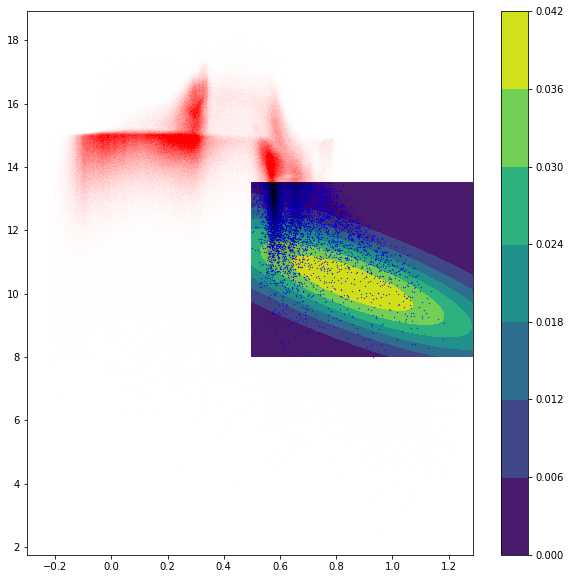

In [43]:
fig = plt.figure(figsize=(10,10))
plt.contourf(col, mag, Z)
plt.colorbar()

plt.scatter(survey.Colour, survey.Happ, c='b', s=0.1)
plt.scatter(full.Colour, full.Happ, c='r', s=0.0001, alpha=0.1)

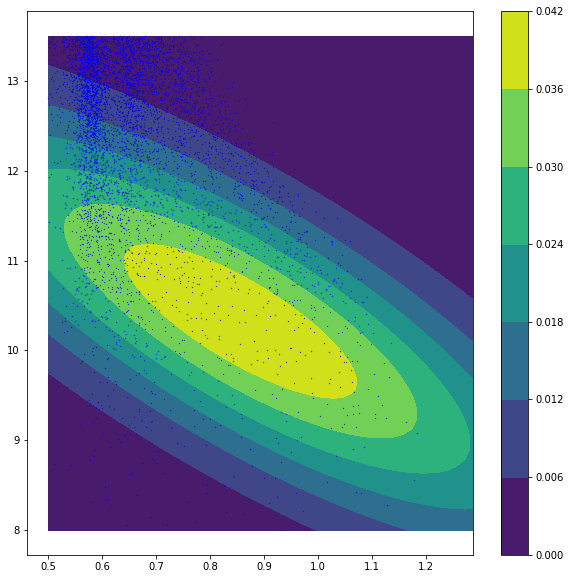

In [44]:
fig = plt.figure(figsize=(10,10))
plt.contourf(col, mag, Z)
plt.colorbar()

plt.scatter(survey.Colour, survey.Happ, c='b', s=0.1)

In [37]:
len(survey)

5992

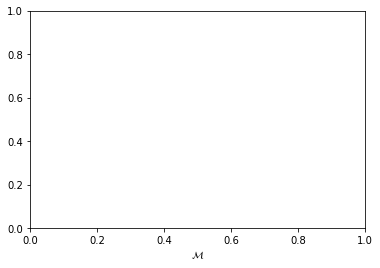

In [3]:
plt.figure()
plt.xlabel(r'$\mathcal{M}$')